# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [33]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
# Setting up URL

base_url = "https://api.openweathermap.org/data/2.5/weather?"


In [74]:
# Setting up the loop: weather data will be the array to hold our info, number will serve as a counter for
# the printout, and total is the total number of cities.

weather_data = []
number = 0
total = len(cities)

# Calling the API and putting the required information into a dictionary nested in the array

for city in cities:
    params = {"q": city, "appid": api_key, "units": "imperial"}
    response = requests.get(base_url, params = params)
    data = response.json()
    try:
        weather_data.append({
            "City": data["name"],
            "Cloudiness": data["clouds"]["all"], 
            "Country": data["sys"]["country"], 
            "Date": data["dt"], 
            "Humidity": data["main"]["humidity"], 
            "Lat": data["coord"]["lat"], 
            "Lng": data["coord"]["lon"], 
            "Max Temp": data["main"]["temp_max"], 
            "Wind Speed": data["wind"]["speed"]
        })
        number += 1

        print(f"Processing Record {number} of {len(cities)} | {city}")
        
    except (KeyError):
        print("City not found. Skipping...")
        total = total - 1
        

        continue
    

Processing Record 1 of 592 | altoona
Processing Record 2 of 592 | kapaa
Processing Record 3 of 592 | kyabram
Processing Record 4 of 592 | niksic
Processing Record 5 of 592 | kawalu
Processing Record 6 of 592 | butaritari
Processing Record 7 of 592 | nanfeng
Processing Record 8 of 592 | albany
Processing Record 9 of 592 | marsh harbour
Processing Record 10 of 592 | nador
City not found. Skipping...
Processing Record 11 of 592 | thompson
Processing Record 12 of 592 | hermanus
Processing Record 13 of 592 | buenos aires
City not found. Skipping...
Processing Record 14 of 592 | hambantota
Processing Record 15 of 592 | el dorado
Processing Record 16 of 592 | fontem
Processing Record 17 of 592 | sistranda
Processing Record 18 of 592 | georgetown
Processing Record 19 of 592 | punta arenas
Processing Record 20 of 592 | katobu
Processing Record 21 of 592 | leningradskiy
Processing Record 22 of 592 | cabo san lucas
Processing Record 23 of 592 | tiksi
Processing Record 24 of 592 | cape town
Proces

City not found. Skipping...
Processing Record 191 of 592 | isangel
Processing Record 192 of 592 | ati
Processing Record 193 of 592 | chiredzi
Processing Record 194 of 592 | koshurnikovo
Processing Record 195 of 592 | sargur
Processing Record 196 of 592 | rio grande
Processing Record 197 of 592 | port hardy
City not found. Skipping...
Processing Record 198 of 592 | smithers
Processing Record 199 of 592 | rawson
Processing Record 200 of 592 | ust-maya
Processing Record 201 of 592 | avarua
Processing Record 202 of 592 | tromso
Processing Record 203 of 592 | zabid
Processing Record 204 of 592 | ahipara
City not found. Skipping...
Processing Record 205 of 592 | irbeyskoye
City not found. Skipping...
Processing Record 206 of 592 | khatanga
Processing Record 207 of 592 | provideniya
Processing Record 208 of 592 | progreso
Processing Record 209 of 592 | noormarkku
Processing Record 210 of 592 | plettenberg bay
Processing Record 211 of 592 | hasaki
Processing Record 212 of 592 | panalingaan
Pro

Processing Record 375 of 592 | tautira
Processing Record 376 of 592 | kjopsvik
Processing Record 377 of 592 | ambulu
City not found. Skipping...
Processing Record 378 of 592 | yeppoon
Processing Record 379 of 592 | vila
City not found. Skipping...
Processing Record 380 of 592 | caldas novas
Processing Record 381 of 592 | celestun
Processing Record 382 of 592 | sambava
Processing Record 383 of 592 | myitkyina
Processing Record 384 of 592 | singaraja
Processing Record 385 of 592 | turbat
Processing Record 386 of 592 | mount pleasant
Processing Record 387 of 592 | tazovskiy
Processing Record 388 of 592 | honiara
Processing Record 389 of 592 | warri
Processing Record 390 of 592 | rio gallegos
Processing Record 391 of 592 | saint-augustin
Processing Record 392 of 592 | colombo
Processing Record 393 of 592 | acapulco
Processing Record 394 of 592 | sochi
Processing Record 395 of 592 | le port
Processing Record 396 of 592 | dakar
Processing Record 397 of 592 | brae
City not found. Skipping...


In [5]:
df = pd.DataFrame(weather_data)
df.head(10)

""


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [78]:
df.to_csv("cities.csv", index = False)

In [3]:
file = pd.read_csv("cities.csv")

In [118]:
# Finding the date and converting it to usable form

date = np.array(df["Date"])
date = time.ctime(date[0])

# String slicing to get month, day, year

m = month[4:7]
day = date[8:10]
year = month[20:]

# Creating date variable to put into graphs

date = f"{m} {day}, {year}"
date

'Aug 27, 2019'

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

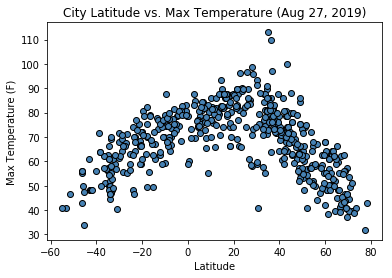

In [113]:
fig, ax = plt.subplots()
ax.scatter(y=df["Max Temp"], x=df["Lat"], marker="o", facecolors="steelblue", edgecolors="black")

# Title, Labela
ax.set_title(f'City Latitude vs. Max Temperature ({date})', fontdict={'size':12})
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (F)")

plt.savefig("Max Temp.jpeg")

plt.show()

#### Latitude vs. Humidity Plot

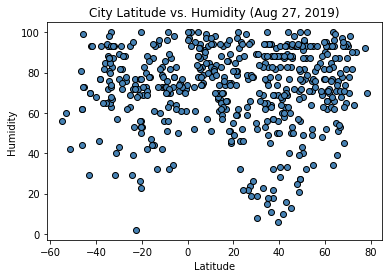

In [114]:
fig, ax = plt.subplots()
ax.scatter(y=df["Humidity"], x=df["Lat"], marker="o", facecolors="steelblue", edgecolors="black")

# Title, Labela
ax.set_title(f'City Latitude vs. Humidity ({date})', fontdict={'size':12})
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity")

plt.savefig("Humidity.jpeg")

plt.show()

#### Latitude vs. Cloudiness Plot

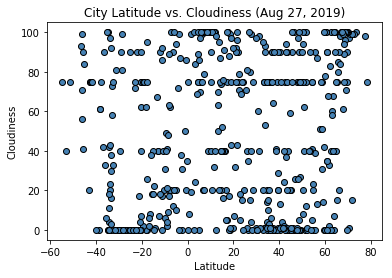

In [115]:
fig, ax = plt.subplots()
ax.scatter(y=df["Cloudiness"], x=df["Lat"], marker="o", facecolors="steelblue", edgecolors="black")

# Title, Labela
ax.set_title(f'City Latitude vs. Cloudiness ({date})', fontdict={'size':12})
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness")

plt.savefig("Cloudiness.jpeg")

plt.show()

#### Latitude vs. Wind Speed Plot

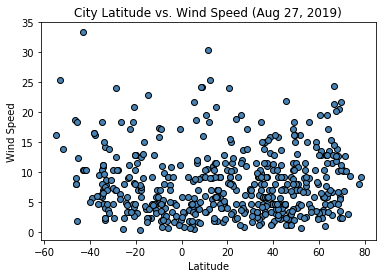

In [116]:
fig, ax = plt.subplots()
ax.scatter(y=df["Wind Speed"], x=df["Lat"], marker="o", facecolors="steelblue", edgecolors="black")

# Title, Labela
ax.set_title(f'City Latitude vs. Wind Speed ({date})', fontdict={'size':12})
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed")

plt.savefig("Wind Speed.jpeg")

plt.show()


# Analysis of Observable Trends

1) Wind speed appears to average somewhere between 5 - 10 mph, which seems pretty normal. The few outliers are probably experiencing storms.

2) There doesn't appear to be any correlation between latitude and cloudiness, although the apparent horizontal striation of the plot is sort of interesting in itself. There aren't many clouds as towns approach the poles. Hole in the ozone layer? Maybe, but it more probably represents the lack of information from those latitudes. There aren't many towns near the poles, so weather information from this data service isn't available.

3) Max temperature very nicely mimics the shape of the earth, supporting the claim that as the earth bulges towards the equator the temperature rises. The outliers are in the 30 - 50 range of the parallels -- not surprising, as it's currently summer in the northern hemisphere and those latitudes are closest to the sun thanks to the earth's tilt.

# Conclusion

The dataset has two limitations. One is lack of information for a significant number of small towns, which turned out to be 13.6% of the towns I generated with these random coordinates. In a world that's western-centric, I suspect the missing data may come from the African and South American continents. I didn't confirm this, though.

The second limitation is that this weather source can access current weather only for the 1/3 of earth's surface not covered by water. The likelihood of catching some tiny Pacific islands with these randomly generated geo-coordinates is low, so we won't be getting much information that's not coming from the six inhabited continents. If the 13.6% loss of information from towns on dry land that don't have weather stations is representative of any potential dataset, then we're getting access to weather from only about 29% of the earth's surface. And that's still a large overestimate because we'll never get geocoordinates that match a town near one of the poles since those towns don't exist. 

Is humidity over the oceans higher since there's more water directly in contact with the air? Is air temperature lower for the same reason? Are winds higher in speed without land obstructions? Or slower because the temperature differential between surface and air is less extreme? Are there more clouds over water or not? None of these questions is answerable with the data available. Based on what we've got, the claim about temperature being related to latitude seems to hold up. It doesn't appear to be influenced by clouds, wind, or humidity, which all look pretty consistent across all latitudes.